In [1]:
# eda for grocery sales forecasting 
import pandas as pd
import seaborn as sns 
import numpy as np 
import datetime
import os 
from matplotlib import pyplot as plt
import random


Exploratory Data Analysis

In [4]:
# test dataset
# ints can be replaced to smaller byte size to optimize performance
# use sample to build model and then replace with full size. 

test = pd.read_csv("/Volumes/HD David/COSC490/favorita-grocery-sales-forecasting/test.csv",parse_dates=['date'])
# train_sample = pd.read_csv("/Volumes/HD David/COSC490/favorita-grocery-sales-forecasting/train.csv",nrows=6000000 ,parse_dates=['date'])
transactions = pd.read_csv("/Volumes/HD David/COSC490/favorita-grocery-sales-forecasting/transactions.csv",parse_dates=['date'])
train_large  = pd.read_csv("/Volumes/HD David/COSC490/favorita-grocery-sales-forecasting/train.csv",parse_dates=['date'])


/Users/davidpinosproano/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:

#read data in chunks of 1 million rows at a time
chunk = pd.read_csv('/Volumes/HD David/COSC490/favorita-grocery-sales-forecasting/train.csv',chunksize=1000000)
pd_df = pd.concat(chunk)



/Users/davidpinosproano/opt/miniconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*args, **kwargs)


In [16]:
import dask.dataframe as dd

# Read in the csv files.
df1 = dd.read_csv("/Volumes/HD David/COSC490/favorita-grocery-sales-forecasting/train.csv",parse_dates=['date'])


# # Merge the csv files.
# df = dd.merge(df1, df2, how='outer', on=['product','version'])

# # Write the output.
# df.to_csv('file3.csv', index=False)

In [27]:
df1.store_nbr.max().compute()

/Users/davidpinosproano/opt/miniconda3/lib/python3.8/site-packages/dask/dataframe/io/csv.py:128: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pandas_read_text(


54

In [5]:
print("Shape of train:" , train_large.shape)
print("Shape of test:" , test.shape)
print("Shape of transactions:" , transactions.shape)


Shape of train: (125497040, 6)
Shape of test: (3370464, 5)
Shape of transactions: (83488, 3)


In [6]:
print("Shape of train:" , train_large.dtypes)
print("Shape of test:" , test.dtypes)
print("Shape of transactions:" , transactions.dtypes)

# datatypes are not the same for onpromotion train, test

Shape of train: id                      int64
date           datetime64[ns]
store_nbr               int64
item_nbr                int64
unit_sales            float64
onpromotion            object
dtype: object
Shape of test: id                      int64
date           datetime64[ns]
store_nbr               int64
item_nbr                int64
onpromotion              bool
dtype: object
Shape of transactions: date            datetime64[ns]
store_nbr                int64
transactions             int64
dtype: object


In [7]:
test.head(5)

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False


In [8]:
train_large.head(5)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [15]:
transactions.head(5)

# join train and transactions on  store_nbr and date 

NameError: name 'transactions' is not defined

In [10]:
# Test 

train_large['onpromotion'].value_counts()

False    96028767
True      7810622
Name: onpromotion, dtype: int64

Transactions 

In [11]:
# Transactions 

tran_eda = transactions.groupby(['date']).agg({"store_nbr":"count", "transactions":np.sum}).reset_index()
tran_eda['transactions'].mean()

84113.5225921522

<AxesSubplot:xlabel='date', ylabel='transactions'>

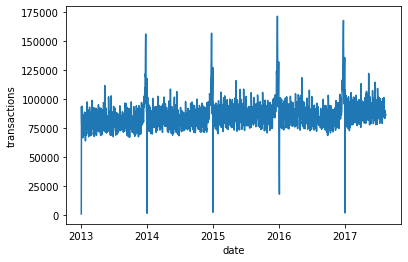

In [12]:
sns.lineplot(data= tran_eda,x = "date", y = "transactions")


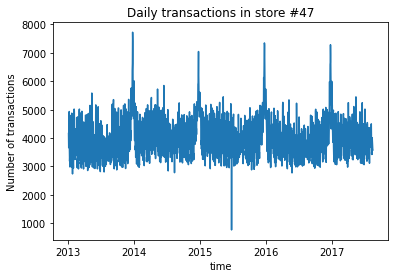

In [13]:
ts=transactions.loc[transactions['store_nbr']==47,['date','transactions']].set_index('date')
ts=ts.transactions.astype('float')

plt.title('Daily transactions in store #47')
plt.xlabel('time')
plt.ylabel('Number of transactions')
plt.plot(ts);

# spikes in sales in december due to christmas bonus

In [14]:
# top 10 days with highest transactions
# all december 24
tran_eda.sort_values(by = "transactions",ascending = False).head(10).reset_index(drop=True)




,date,store_nbr,transactions
0,2015-12-24,53,171169
1,2016-12-24,53,167542
2,2016-12-23,53,156932
3,2014-12-24,48,156546
4,2013-12-24,47,155846
5,2015-12-23,53,153338
6,2013-12-23,47,145876
7,2014-12-23,48,144513
8,2015-12-22,53,138921
9,2016-12-22,53,138892


Test 

In [15]:
test['onpromotion'] = test['onpromotion'].fillna(0)
test['onpromotion'] = test['onpromotion'].astype(int)


Train 

In [16]:
# take sample using seed 
random.seed(100)
sample1 = train_large.sample(n=1000000)
sample1 = sample1.reset_index(drop =True)


In [17]:
# percent of NaNs in sample 
1- (sample1.onpromotion.value_counts().sum() / len(sample1) ) 
# 0.17

# setting the onpromotion to int Replacing nans with 0  
sample1['onpromotion'] = sample1['onpromotion'].fillna(0)
sample1['onpromotion'] = sample1['onpromotion'].astype(int)



In [18]:
sample1

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,30183905,2014-09-03,44,1489871,36.0000,1
1,121506992,2017-07-08,50,410150,1.0000,0
2,96443997,2016-11-09,48,695758,3.8070,0
3,16856287,2014-01-10,8,1085246,3.5727,0
4,23340229,2014-05-04,46,114778,15.0000,0
...,...,...,...,...,...,...
999995,81849722,2016-06-11,42,1473425,1.6740,0
999996,97860657,2016-11-24,22,1161046,1.0000,0
999997,114273994,2017-05-01,47,911990,15.0000,0
999998,95527994,2016-10-31,46,574898,6.0000,1


In [19]:
# sales per item 
# tran_eda = samples.groupby(['date']).agg({"store_nbr":"count", "transactions":np.sum}).reset_index()

expl = sample1.groupby(by = "date")['unit_sales'].sum().reset_index()
expl


,date,unit_sales
0,2013-01-01,23.000
1,2013-01-02,4597.815
2,2013-01-03,3118.957
3,2013-01-04,2817.652
4,2013-01-05,3912.123
...,...,...
1679,2017-08-11,7314.394
1680,2017-08-12,9494.482
1681,2017-08-13,8665.726
1682,2017-08-14,5961.013


<AxesSubplot:xlabel='date', ylabel='unit_sales'>

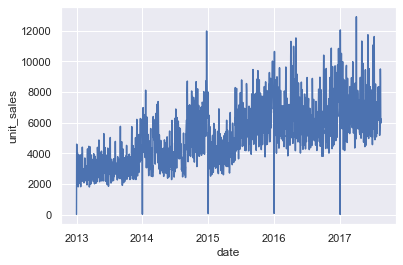

In [20]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="date", y="unit_sales",data=expl)

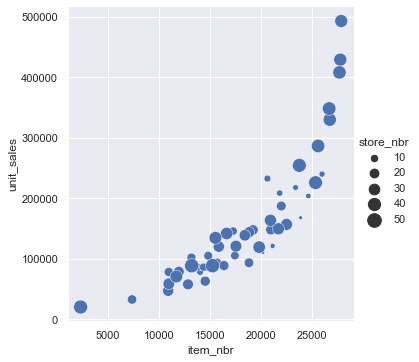

In [21]:
# group by store , get the amount of items and total unit sales 

planets = sample1.groupby(by = 'store_nbr').agg({"item_nbr":"count","unit_sales":"sum"})
sns.relplot(data=planets, x="item_nbr", y="unit_sales", size="store_nbr", sizes=(10, 200))


In [22]:
# take a look at start dates to see if we have to remove them 
# earthquake 


Data Pipeline 


In [25]:
# train, transactions 

# print(sample1.shape)

sample1.merge(transactions,how= "left", on = "store_nbr" )




In [ ]:
# stores,holidays_cleaned,items,oil_merged